In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from pathlib import Path
from os.path import  basename,splitext
import seaborn as sns
import pandas as pd
from math import ceil
from matplotlib.lines import Line2D

In [2]:
def display(dataset,  prefix=""):
    """Creates a fil displaying a summary of the model

    Arguments:
        results {List[GraphWrapper)] -- instance of the graph
                                        for each iteration
        summary_fct {fonction} -- function returning a summary dict
        title {str} -- Figure's title

    Keyword Arguments:
        prefix {str} -- filen (default: {""})
    """
    """
    Displays five different charts

    Arguments:
        results {[type]} - - [description]

    Keyword Arguments:
        prefix {str} - - [description](default: {""})
    """

    fig = plt.figure(figsize=(10, 10))

    for idx, label in enumerate(dataset):
        ax = plt.subplot(len(dataset), 1, idx + 1)
        ax.plot(dataset[label], label='Sample value')
        ax.plot(cumul_avg(dataset[label]), label='Cumulative average')
        ax.set_ylabel(label)

    plt.legend()
    plt.xlabel("Iterations")

    plt.subplots_adjust(hspace=0.4)
    plt.suptitle('Dynamic of the simulation')

def cumul_avg(tab):
    """Given a list of computable values (int/float)
    computes the corresponding list of moving average
    (cumulative average)

    Arguments:
        tab {List[int]} -- List of observed values

    Returns:
        {List[int]} -- Corresponding list of moving average
    """

    res = list()
    res = np.cumsum(tab) / np.arange(1, len(tab) + 1)
    #for i in range(1, len(tab)):
    #    cum_avg = sum(tab[0:i]) / (i + 1)
    #    res.append(cum_avg)

    return res

In [3]:
RECORDS_DIR = './assets/teams_test/'
p = Path(RECORDS_DIR)
config_files = list(p.glob("*txt"))
config_files = sorted(config_files, key=lambda x: basename(x))
sizes = dict()
y_obs = dict()

for conf in config_files:
    filename = splitext(conf.name)[0].split('_')[0]
    with open(conf) as sizes_file:
        lines = sizes_file.readlines()
    for l in lines:
        if l.startswith("size"):
            splitted_line = l.replace(" ", "").split(":")[-1].rstrip().split(',')
            sizes[filename] = [int(splitted_line[0]), int(splitted_line[1])]
        elif l.startswith("y_obs"):
            splitted_line = l.replace(" ", "").split(":")[-1].rstrip().split(',')
            y_obs[filename] = [int(splitted_line[0]), int(splitted_line[1]), int(splitted_line[2])]

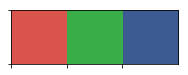

In [4]:
colors = [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], sns.xkcd_rgb["denim blue"]]
sns.palplot(colors)
sns.set_palette("muted")

[PosixPath('assets/sim_post_journal_paper_test/CAPSID_traces.csv'), PosixPath('assets/sim_post_journal_paper_test/CARAMBA_traces.csv'), PosixPath('assets/sim_post_journal_paper_test/CARTE_traces.csv'), PosixPath('assets/sim_post_journal_paper_test/KIWI_traces.csv'), PosixPath('assets/sim_post_journal_paper_test/MAIA_traces.csv'), PosixPath('assets/sim_post_journal_paper_test/NEUROSYS_traces.csv'), PosixPath('assets/sim_post_journal_paper_test/PESTO_traces.csv'), PosixPath('assets/sim_post_journal_paper_test/SEMAGRAMME_traces.csv'), PosixPath('assets/sim_post_journal_paper_test/SMarT_traces.csv'), PosixPath('assets/sim_post_journal_paper_test/SYNALP_traces.csv')]
CAPSID [104, 273, 268]
t11(t) =   75.53055305530553
t12(t) =   264.2956295629563
t22(t) =   274.6749674967497
convergence t11 :  -0.5098961201250122
convergence t12 :  -0.1102277906166978
convergence t22 :  0.11761619857942746
CARAMBA [3, 4, 5]
t11(t) =   1.9604960496049606
t12(t) =   4.187318731873187
t22(t) =   5.117111711171

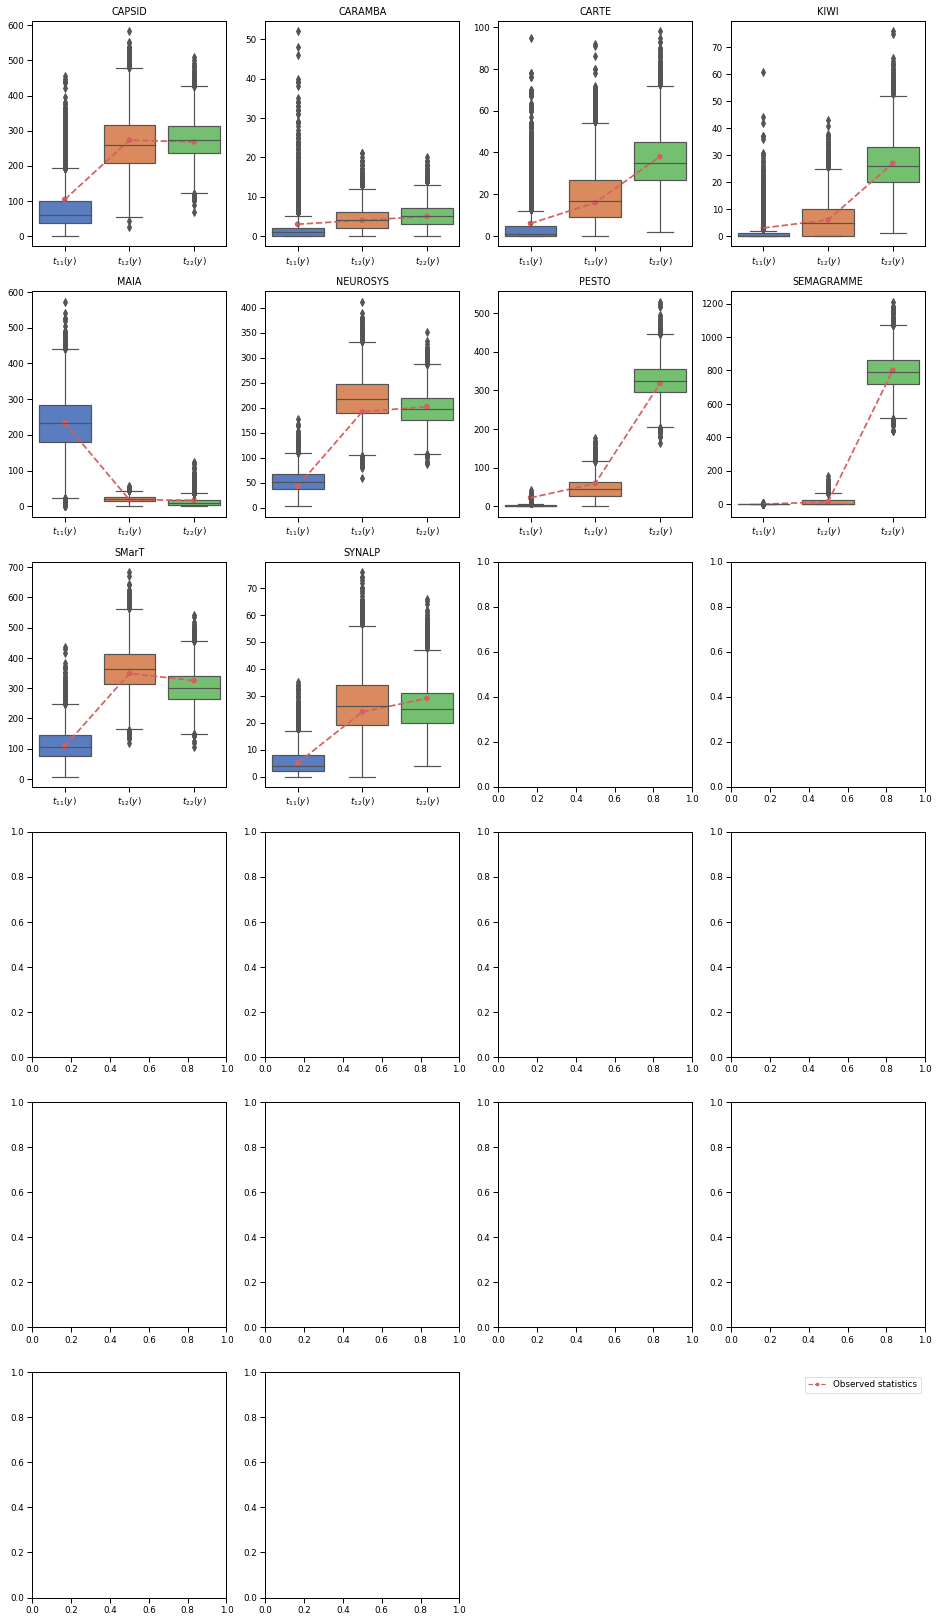

In [5]:
sns.set_context("paper")
post_sim_dir = "./assets/sim_post_journal_paper_test"
txt_pattern = "*csv"
by=1
post_sim_path = Path(post_sim_dir)
files = list(post_sim_path.glob(txt_pattern))
files = sorted(files, key=lambda x: basename(x))
print(files)
width = 4
heigh = ceil(22 / width)
fig, axs = plt.subplots(heigh,width, figsize=(16,29))
for idx, f in enumerate(files):
    filename = splitext(f.name)[0].split('_')[0]
    print(filename, y_obs[filename])
    with open(f, 'r') as file:
        reader = csv.reader(file,delimiter=',')
        raw_data = list()
        for row in reader:
            raw_data.append([float(r) for r in row])
        data_trans = np.array(raw_data).transpose()
        data = dict()
        data[r"$t_{11}(y)$"] = data_trans[0][1::by]
        data[r"$t_{12}(y)$"] = data_trans[1][1::by] 
        data[r"$t_{22}(y)$"] = data_trans[2][1::by]
        t = np.zeros(3)
        t[0] = np.mean( data[r"$t_{11}(y)$"])
        t[1] = np.mean( data[r"$t_{12}(y)$"])
        t[2] = np.mean( data[r"$t_{22}(y)$"])
        print("t11(t) =  ", t[0])
        print("t12(t) =  ", t[1])
        print("t22(t) =  ", t[2])
        #print("delta = ", y_obs[filename] - t)
        print("convergence t11 : ", (t[0] - y_obs[filename][0])/np.std(data[r"$t_{11}(y)$"]) )
        print("convergence t12 : ", (t[1] - y_obs[filename][1])/np.std(data[r"$t_{12}(y)$"]) )
        print("convergence t22 : ", (t[2] - y_obs[filename][2])/np.std(data[r"$t_{22}(y)$"]) )
        df_sim = pd.DataFrame.from_dict(data)
        sns.boxplot(data=df_sim, ax=axs[idx // width, idx % width])
        axs[idx // width, idx % width].set_title(filename)
        sns.pointplot(x=[r"$t_{11}(y)$", r"$t_{12}(y)$", r"$t_{22}(y)$"], y=y_obs[filename], linestyles='--', scale=0.8, label="test", color='#d65f5f', errwidth=0, capsize=0, ax=axs[idx // width, idx % width])
        #display(data, 'Gibbs Potts')
axs[5,2].axis('off')
axs[5,3].axis('off')
red_line = Line2D([], [], color='#d65f5f', marker='.', linestyle='--', markersize=5, label='Observed statistics')
plt.legend(handles=[red_line])
plt.show()